In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import torch


In [3]:
df = pd.read_csv("BlackFriday.csv")
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


Delete NaN values

In [12]:
df.dropna(inplace=True)
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
13,1000005,P00145042,M,26-35,20,A,1,1,1,2.0,5.0,15665
14,1000006,P00231342,F,51-55,9,A,1,0,5,8.0,14.0,5378
16,1000006,P0096642,F,51-55,9,A,1,0,2,3.0,4.0,13055
...,...,...,...,...,...,...,...,...,...,...,...,...
537549,1004734,P00345842,M,51-55,1,B,1,1,2,8.0,14.0,13082
537551,1004735,P00313442,M,46-50,3,C,3,0,5,6.0,8.0,6863
537562,1004736,P00146742,M,18-25,20,A,1,1,1,13.0,14.0,11508
537571,1004737,P00221442,M,36-45,16,C,1,0,1,2.0,5.0,11852


Boxplot:
<br>1.the line in the middle of the box represents the median of the data, indicating the average level of the sample data.
<br>2.the upper and lower limits of the box correspond to the upper and lower quartiles of the data, respectively. This means that the box contains 50% of the data. Therefore, the width of the box to some extent reflects the degree of fluctuation in the data.
<br>3.there are lines above and below the box. Sometimes they represent the maximum and minimum values, and sometimes some points "pop out." Do not be bothered. If there are any points that pop out, just understand it as "outliers."

<AxesSubplot:ylabel='Purchase'>

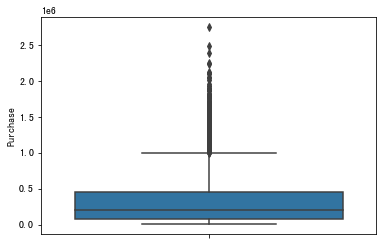

In [37]:
# Check the distribution of data
values = df.groupby("User_ID").sum()['Purchase'] 
sns.boxplot(y = values)

([<matplotlib.patches.Wedge at 0x7fbd696a9790>,
 [Text(0.11943788263913328, 1.0934964984812163, 'M_0'),
  Text(-0.8005498237242125, -0.7544004107469272, 'M_1'),
  Text(0.5975030916772912, -0.9235746074010907, 'F_0'),
  Text(1.0539748645255957, -0.31486026257413363, 'F_1')],
 [Text(0.06514793598498178, 0.5964526355352089, '46.54%'),
  Text(-0.4366635402132068, -0.4114911331346875, '30.98%'),
  Text(0.3259107772785224, -0.5037679676733221, '13.24%'),
  Text(0.5748953806503249, -0.17174196140407286, '9.24%')])

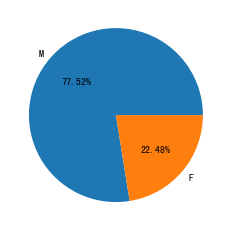

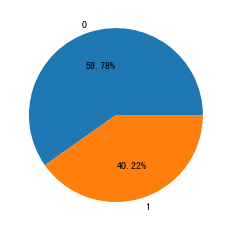

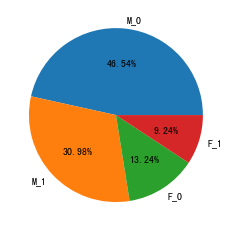

In [50]:
# Distribution of Gender
gender = df['Gender'].value_counts()
plt.pie(gender.values,labels=gender.index,autopct="%.2f%%")

# Distribution of Marital Status
plt.figure()
marial = df['Marital_Status'].value_counts()
plt.pie(marial.values,labels=marial.index,autopct="%.2f%%")

# One pie chart shows Gender and Marital Status meantime
plt.figure()
# DataFrame:0 = row, 1 = column
gender_marial = df.apply(lambda row: "%s_%s"%(row['Gender'],row['Marital_Status']),axis=1).value_counts()
# print(gender_marial)
plt.pie(gender_marial.values,labels = gender_marial.index,autopct="%.2f%%")



/Users/sheldonnnn/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


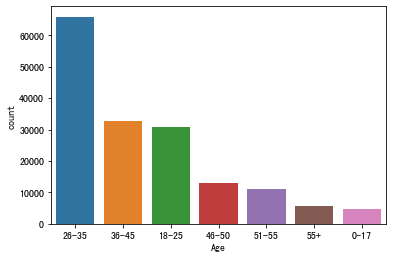

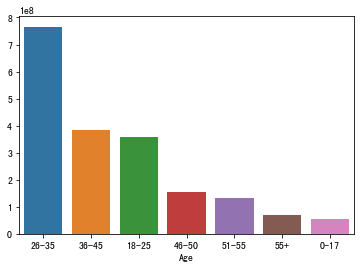

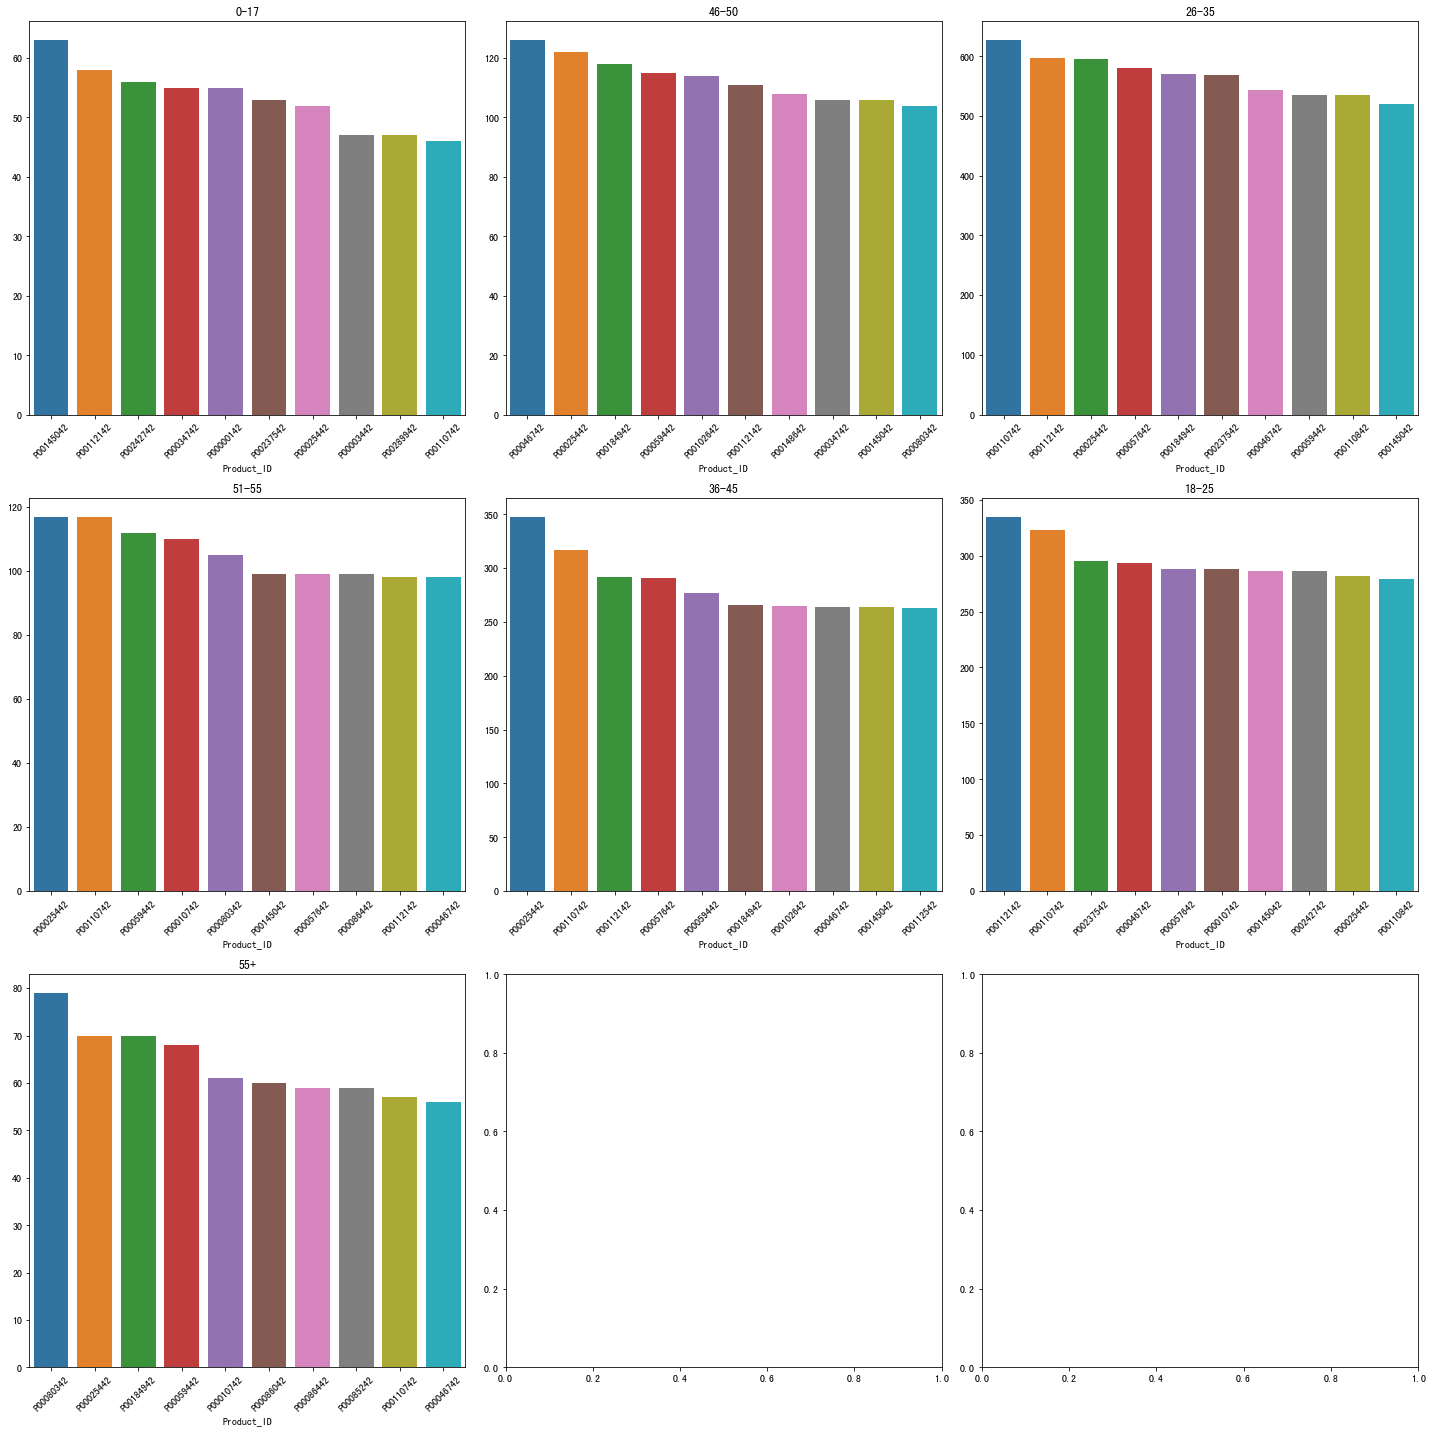

In [51]:
# Check how age group affects purchases 
# Check the distribution of age
sns.countplot(df['Age'],order=df['Age'].value_counts(ascending=False).index)

# Check which age group spends the most
plt.figure()
age_purchase = df.groupby("Age").sum()['Purchase'].sort_values(ascending=False)
sns.barplot(x=age_purchase.index,y=age_purchase.values)

# Check the top10 products purchased by each age group
fig,axes = plt.subplots(3,3)
fig.set_figwidth(20)
fig.set_figheight(20)
age_product_data = df.groupby(['Age','Product_ID']).count().sort_values(by="User_ID",ascending=False)
ages = df.Age.unique()
for index,age in enumerate(ages):
    products = age_product_data.loc[age].iloc[:10]['User_ID']
    ax = axes[index//3,index%3]
    sns.barplot(x=products.index,y=products.values,ax=ax)
    ax.set_xticklabels(products.index,rotation=45)
    ax.set_title(age)
plt.tight_layout()

/Users/sheldonnnn/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/sheldonnnn/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_1', ylabel='count'>

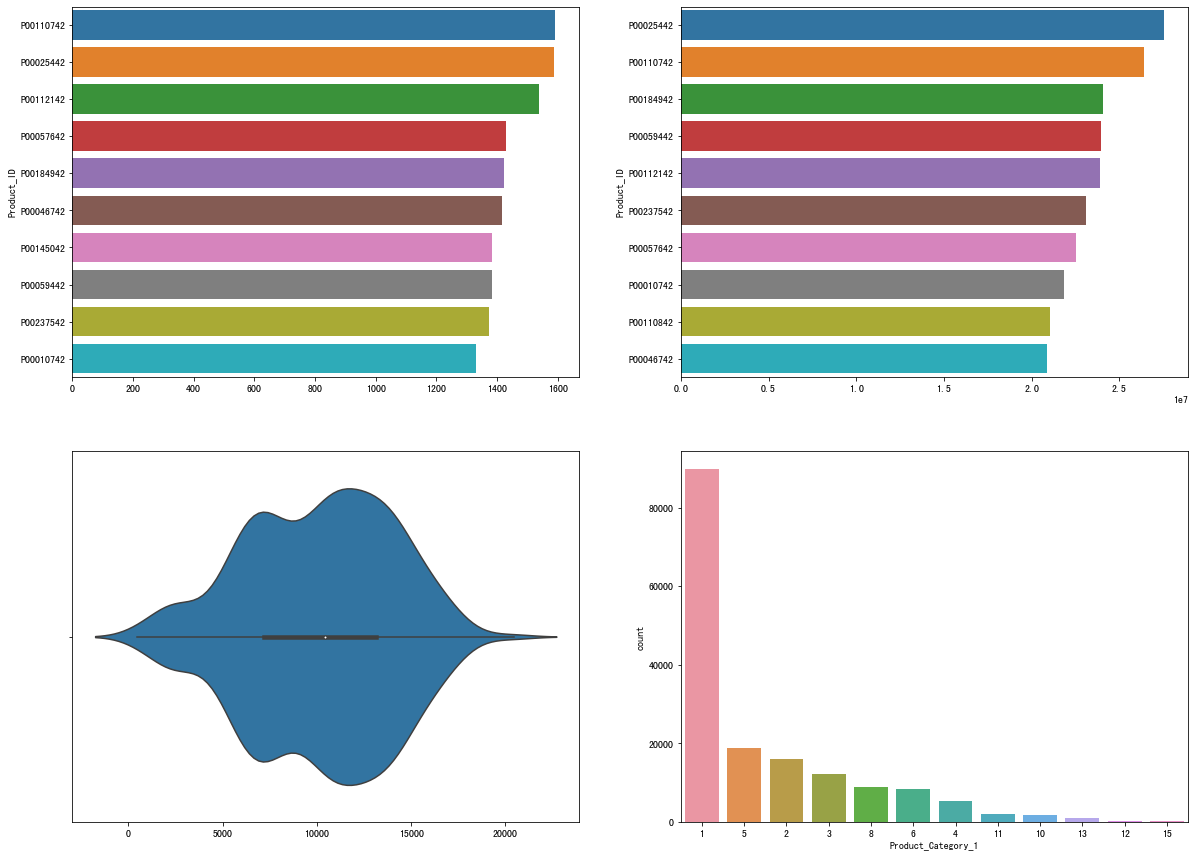

In [52]:
# Check product availability
fig,axes = plt.subplots(2,2,figsize=(20,15))
# 1. Check Top 10 Selling Products
product_group = df.groupby("Product_ID").agg({"User_ID":"count","Purchase":"sum"})
ax1 = axes[0,0]
top10_count = product_group['User_ID'].sort_values(ascending=False)[:10]
sns.barplot(y=top10_count.index,x=top10_count.values,ax=ax1)

# 2. Check Top 10 Products by Sales
ax2 = axes[0,1]
top10_sum = product_group['Purchase'].sort_values(ascending=False)[:10]
sns.barplot(y=top10_sum.index,x=top10_sum.values,ax=ax2)

# 3. Check the unit price distribution of the products sold
# Compared with the box plot, the undoubted advantage of the violin plot 
# is that in addition to showing the above statistics, it also shows the overall distribution of the data.
ax3 = axes[1,0]
product_price = product_group['Purchase']/product_group['User_ID']
sns.violinplot(product_price,ax=ax3)

# 4.Check the distribution of product categories in Product_Category_1
category1 = df['Product_Category_1']
sns.countplot(category1,order=category1.value_counts(ascending=False).index)



<AxesSubplot:xlabel='Stay_In_Current_City_Years'>

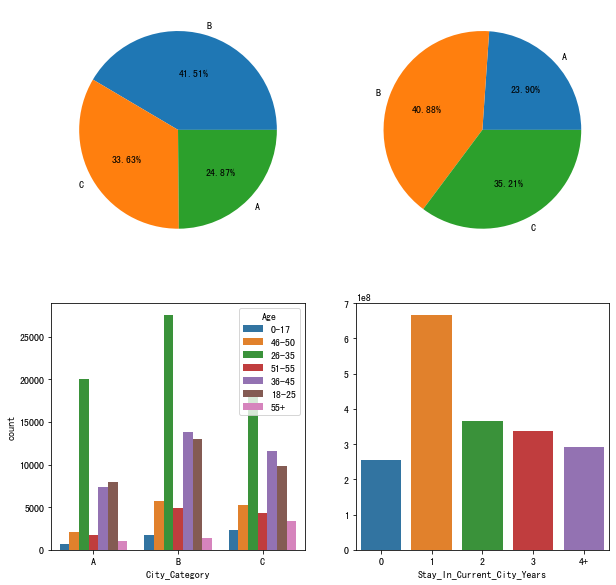

In [53]:
# Correlation between purchase and city
fig,axes = plt.subplots(2,2,figsize=(10,10))
# Analysis of the number of buyers in different cities
city_number = df['City_Category'].value_counts()
axes[0,0].pie(city_number.values,labels=city_number.index,autopct="%.2f%%")

# Analysis of Consumption Amount in Different Cities
city_purchase = df.groupby('City_Category').sum()['Purchase']
axes[0,1].pie(city_purchase.values,labels=city_purchase.index,autopct="%.2f%%")

# The age distribution of people in different cities
sns.countplot(x="City_Category",hue="Age",data=df,ax=axes[1,0])

# The relationship between the years of staying in the city and the purchase
city_year = df.groupby("Stay_In_Current_City_Years").sum()['Purchase']
sns.barplot(x=city_year.index,y=city_year.values)



In [56]:
df.groupby(['City_Category','Product_ID']).count()

User_ID  Gender  Age  Occupation  \
City_Category Product_ID                                     
A             P00000142       244     244  244         244   
              P00000242        82      82   82          82   
              P00000642       134     134  134         134   
              P00001042       130     130  130         130   
              P00001142       145     145  145         145   
...                           ...     ...  ...         ...   
C             P0097342        102     102  102         102   
              P0099042         32      32   32          32   
              P0099742         41      41   41          41   
              P0099842         32      32   32          32   
              P0099942          1       1    1           1   

                          Stay_In_Current_City_Years  Marital_Status  \
City_Category Product_ID                                               
A             P00000142                          244             244   
              P00000242                           82              82   
              P00000642                          134             134   
              P00001042                          130             130   
              P00001142                          145             145   
...                                              ...             ...   
C             P0097342                           102             102   
              P0099042                            32              32   
              P0099742                            41              41   
              P0099842                            32              32   
              P0099942                             1               1   

                          Product_Category_1  Product_Category_2  \
City_Category Product_ID                                           
A             P00000142                  244                 244   
              P00000242                   82                  82   
              P00000642                  134                 134   
              P00001042                  130                 130   
              P00001142                  145                 145   
...                                      ...                 ...   
C             P0097342                   102                 102   
              P0099042                    32                  32   
              P0099742                    41                  41   
              P0099842                    32                  32   
              P0099942                     1                   1   

                          Product_Category_3  Purchase  
City_Category Product_ID                                
A             P00000142                  244       244  
              P00000242                   82        82  
              P00000642                  134       134  
              P00001042                  130       130  
              P00001142                  145       145  
...                                      ...       ...  
C             P0097342                   102       102  
              P0099042                    32        32  
              P0099742                    41        41  
              P0099842                    32        32  
              P0099942                     1         1  

[1568 rows x 10 columns]

Text(0.5, 1.0, 'c-a differ')

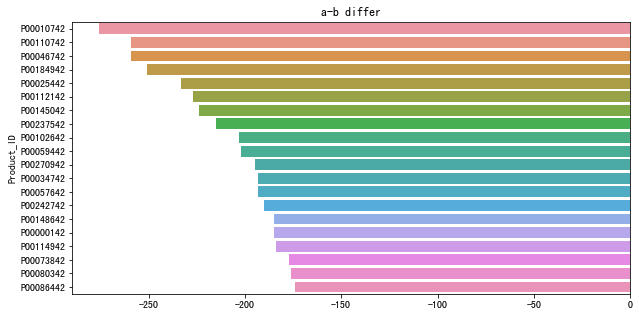

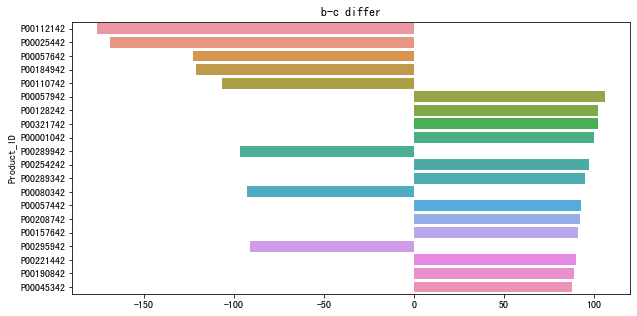

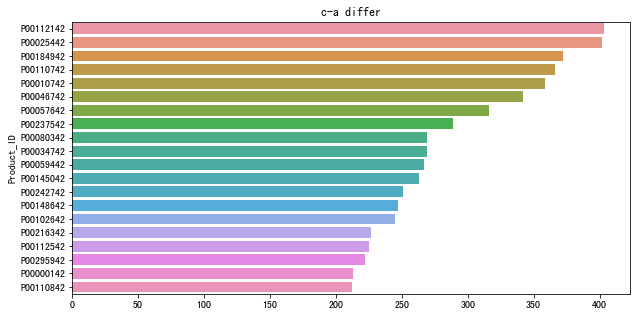

In [59]:
# Find the product with the largest difference between cities.
city_product = df.groupby(['City_Category','Product_ID']).count()['User_ID']
a_city_product = city_product.loc['A']
b_city_product = city_product.loc['B']
c_city_product = city_product.loc['C']

# Find the common ptoducts
common_index = a_city_product.index.intersection(b_city_product.index).intersection(c_city_product.index)

def city_differ_plot(city_product1,city_product2):
    city_differ = city_product1.loc[common_index] - city_product2.loc[common_index]
    order_index = np.abs(city_differ).sort_values(ascending=False)[:20].index
    city_differ_temp = city_differ.loc[order_index]
    plt.figure(figsize=(10,5))
    ax = sns.barplot(y=city_differ_temp.index,x=city_differ_temp.values)
    return ax

ax1 = city_differ_plot(a_city_product,b_city_product)
ax1.set_title("a-b differ")

ax2 = city_differ_plot(b_city_product,c_city_product)
ax2.set_title("b-c differ")

ax3 = city_differ_plot(c_city_product,a_city_product)
ax3.set_title("c-a differ")

